# **Importing the libraries and loading the data**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Load the dataset
file_path = '/content/Chronic_Kidney_Dsease_data_Cleaned.csv'
df = pd.read_csv(file_path)

# **Starting the EDA on data**


*   first we look for missing values.
*   then we look for descriptive analysis of the data to find outliers .

*   we draft the correlation matrix of all the variables
*   We categorise and then draft the correlation matrix.







 1.Handling missing values



In [2]:
# Handle missing values
df = df.fillna(df.median(numeric_only=True))
df = df.fillna(df.mode().iloc[0])


**2. Descriptive analysis**

In [3]:
# Descriptive Statistics
print(df.describe())
print(df.describe(include=['object', 'category']))


         PatientID          Age       Gender   Ethnicity  SocioeconomicStatus  \
count  1659.000000  1659.000000  1659.000000  1659.00000          1659.000000   
mean    830.000000    54.441230     0.515371     0.71308             0.977697   
std     479.056364    20.549757     0.499914     1.00043             0.776686   
min       1.000000    20.000000     0.000000     0.00000             0.000000   
25%     415.500000    36.000000     0.000000     0.00000             0.000000   
50%     830.000000    54.000000     1.000000     0.00000             1.000000   
75%    1244.500000    72.000000     1.000000     1.00000             2.000000   
max    1659.000000    90.000000     1.000000     3.00000             2.000000   

       EducationLevel          BMI      Smoking  AlcoholConsumption  \
count     1659.000000  1659.000000  1659.000000         1659.000000   
mean         1.693189    27.620045     0.292948            9.969835   
std          0.910611     7.288658     0.455252          

**3. Correlation analysis for all the data**

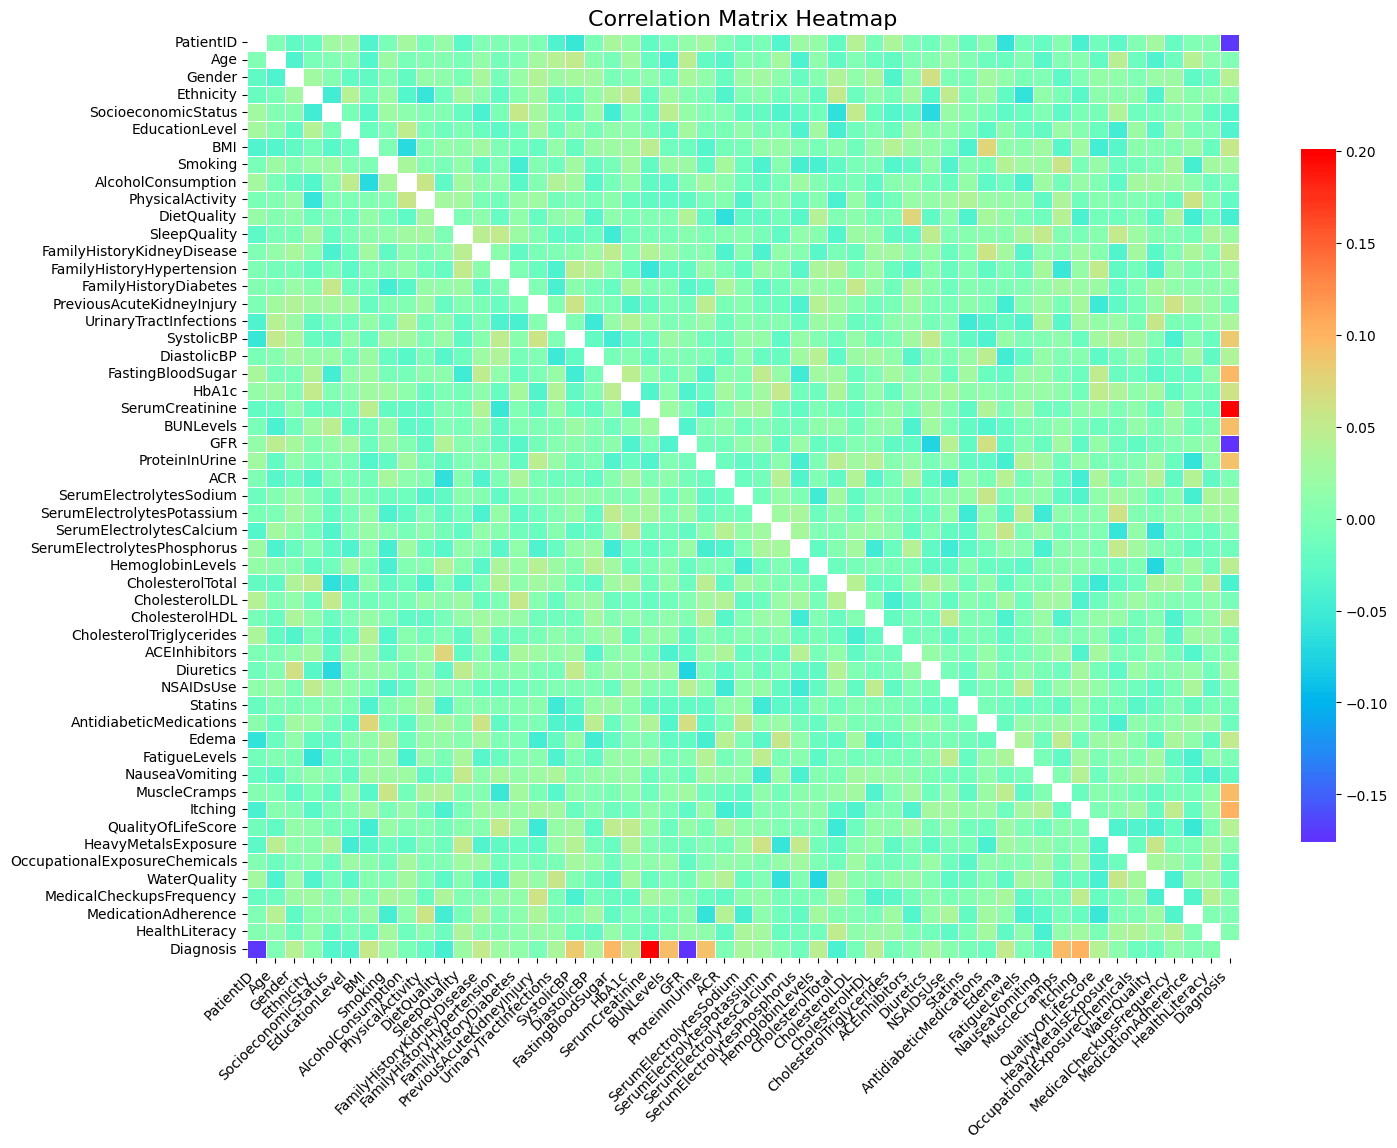

In [6]:
# Correlation Analysis

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])
# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Create a mask for the diagonal
mask = np.eye(corr_matrix.shape[0], dtype=bool)

# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='rainbow', center=0, linewidths=0.5, linecolor='white', cbar_kws={"shrink": 0.75})

plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)
plt.show()

**4. Correlation plot with categorised data**

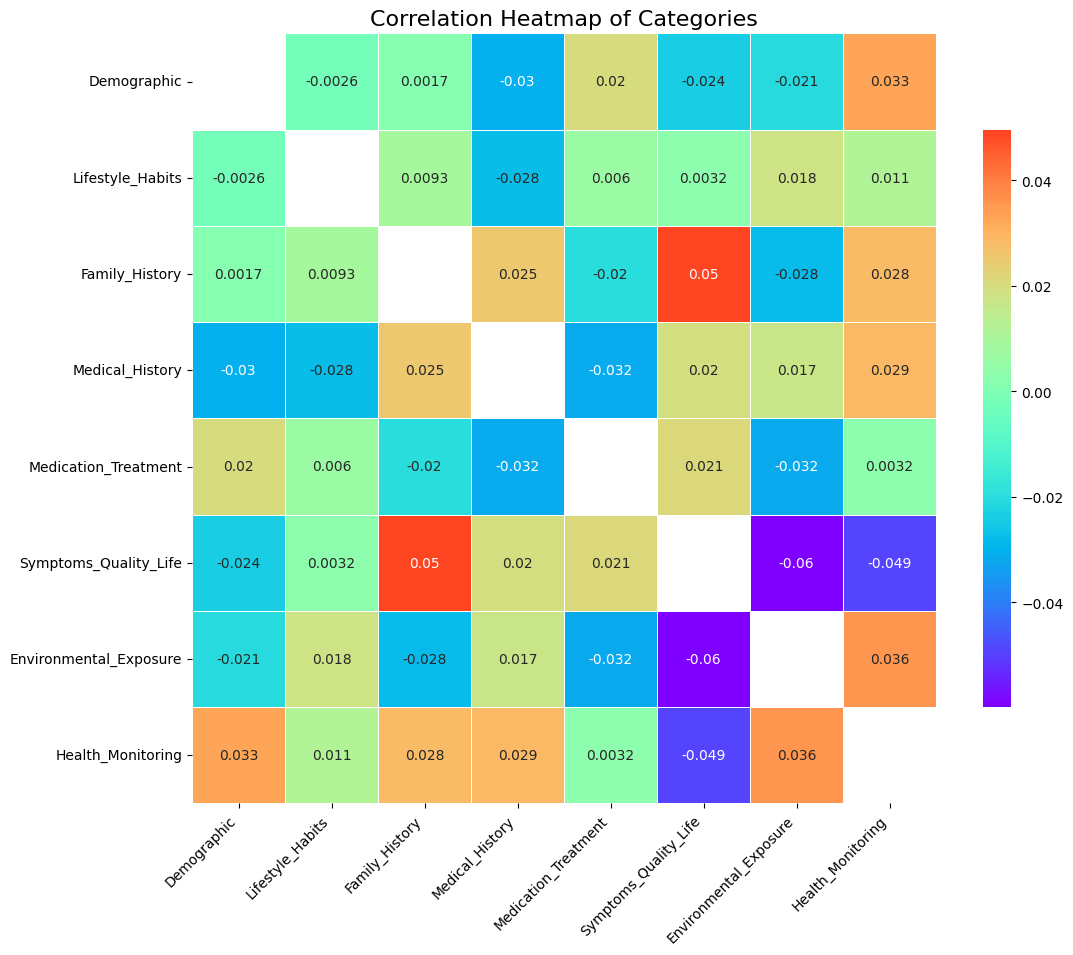

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Categorize the data
categories = {
    'Demographic': ['Age', 'Gender', 'Ethnicity', 'SocioeconomicStatus', 'EducationLevel'],
    'Lifestyle_Habits': ['Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality'],
    'Family_History': ['FamilyHistoryKidneyDisease', 'FamilyHistoryHypertension', 'FamilyHistoryDiabetes'],
    'Medical_History': ['BMI', 'PreviousAcuteKidneyInjury', 'SystolicBP', 'DiastolicBP', 'FastingBloodSugar', 'HbA1c',
                        'SerumCreatinine', 'BUNLevels', 'GFR', 'ProteinInUrine', 'ACR', 'SerumElectrolytesSodium',
                        'SerumElectrolytesPotassium', 'SerumElectrolytesCalcium', 'SerumElectrolytesPhosphorus',
                        'HemoglobinLevels', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides'],
    'Medication_Treatment': ['ACEInhibitors', 'Diuretics', 'NSAIDsUse', 'Statins', 'AntidiabeticMedications'],
    'Symptoms_Quality_Life': ['Edema', 'FatigueLevels', 'NauseaVomiting', 'MuscleCramps', 'Itching', 'QualityOfLifeScore'],
    'Environmental_Exposure': ['HeavyMetalsExposure', 'OccupationalExposureChemicals', 'WaterQuality'],
    'Health_Monitoring': ['MedicalCheckupsFrequency', 'MedicationAdherence', 'HealthLiteracy'],
}

# Aggregate data by category
aggregated_data = {category: df[columns].mean(axis=1) for category, columns in categories.items()}

# Create a DataFrame from the aggregated data
aggregated_df = pd.DataFrame(aggregated_data)

# Compute the correlation matrix
corr_matrix = aggregated_df.corr()

# Create a mask for the diagonal
mask = np.eye(corr_matrix.shape[0], dtype=bool)

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='rainbow', center=0, linewidths=0.5, linecolor='white', cbar_kws={"shrink": 0.75})

plt.title('Correlation Heatmap of Categories', fontsize=16)
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)
plt.show()


**5. Corrleation plot with target variable (Diagonsis)**

<ipython-input-18-dd212537b126>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_target_sorted.index, y=correlation_with_target_sorted.values, palette='coolwarm')


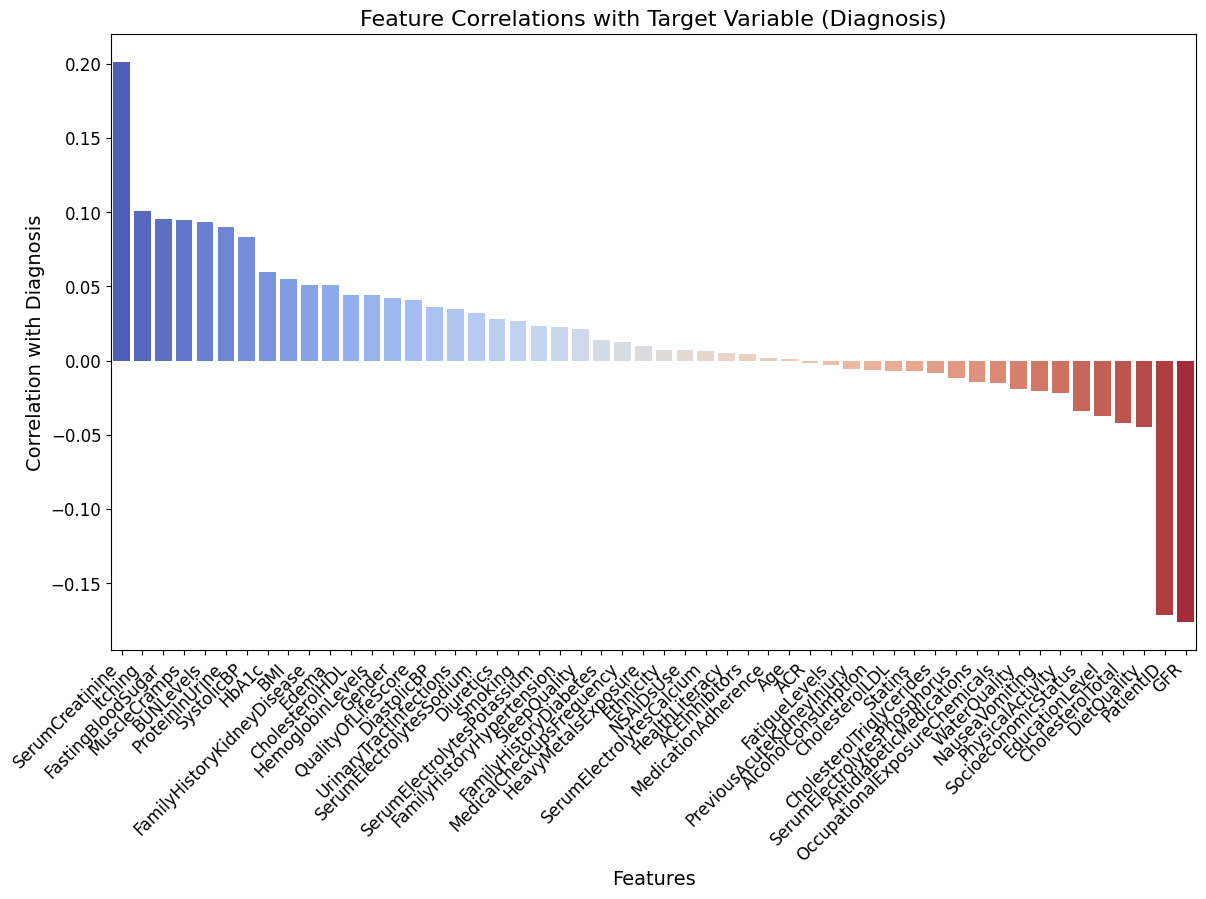

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate correlation with the target variable
correlation_with_target = numeric_df.corr()['Diagnosis'].drop('Diagnosis')

# Sort the correlations
correlation_with_target_sorted = correlation_with_target.sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(14, 8))
sns.barplot(x=correlation_with_target_sorted.index, y=correlation_with_target_sorted.values, palette='coolwarm')
plt.title('Feature Correlations with Target Variable (Diagnosis)', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Correlation with Diagnosis', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**Finding the best 15 features to work on**

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
df_numeric = df.select_dtypes(include=[float, int])
# Assuming 'Diagnosis' is the target variable
X = df_numeric.drop(columns=['Diagnosis'])
y = df['Diagnosis']

# Apply SelectKBest class to extract top 10 best features
best_features = SelectKBest(score_func=f_classif, k=10)
fit = best_features.fit(X, y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Concat two dataframes for better visualization
feature_scores = pd.concat([dfcolumns, dfscores], axis=1)
feature_scores.columns = ['Specs', 'Score']  # Naming the dataframe columns
print(feature_scores.nlargest(15, 'Score'))  # Print the top 15 features

                         Specs      Score
21             SerumCreatinine  69.857634
23                         GFR  52.960261
0                    PatientID  50.155952
44                     Itching  16.962910
19           FastingBloodSugar  15.313900
43                MuscleCramps  15.029959
22                   BUNLevels  14.487479
24              ProteinInUrine  13.527854
17                  SystolicBP  11.642036
20                       HbA1c   5.983062
6                          BMI   5.068331
12  FamilyHistoryKidneyDisease   4.310007
40                       Edema   4.296826
10                 DietQuality   3.287922
33              CholesterolHDL   3.264484


**Comparing the results from select k best method and anova test**

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif


# Select only numeric columns
df_numeric = df.select_dtypes(include=[float, int])

# Assuming 'Diagnosis' is the target variable
X = df_numeric.drop(columns=['Diagnosis'])
y = df['Diagnosis']

# Apply SelectKBest to extract top 15 best features
best_features = SelectKBest(score_func=f_classif, k=15)
fit = best_features.fit(X, y)

dfscores = pd.DataFrame(fit.scores_, index=X.columns, columns=['ANOVA F-Score'])
anova_top_features = dfscores.nlargest(15, 'ANOVA F-Score')

# Calculate correlation with the target variable
correlation_with_target = df_numeric.corr()['Diagnosis'].drop('Diagnosis').sort_values(ascending=False)
correlation_top_features = correlation_with_target[:15].to_frame(name='Correlation')

# Combine results
combined_results = pd.concat([anova_top_features, correlation_top_features], axis=1)

# Select features based on combined results
selected_features = combined_results.index.tolist()
print("Selected Features:", selected_features)

Selected Features: ['SerumCreatinine', 'GFR', 'PatientID', 'Itching', 'FastingBloodSugar', 'MuscleCramps', 'BUNLevels', 'ProteinInUrine', 'SystolicBP', 'HbA1c', 'BMI', 'FamilyHistoryKidneyDisease', 'Edema', 'DietQuality', 'CholesterolHDL', 'HemoglobinLevels', 'Gender', 'QualityOfLifeScore']


**Building the  classification machine learning model**


*   Logistic Regression
*   KNN classifier
*   Random Forest
*   Random forest classifier




In [14]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Prepare the data with selected features
X = df[selected_features]
y = df['Diagnosis']

# Split the data into training and testing sets with 30% test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define a function to train and evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    return accuracy, conf_matrix, class_report

# Logistic Regression
logistic_model = LogisticRegression(max_iter=2000, random_state=42, class_weight='balanced')
accuracy_logistic, conf_matrix_logistic, class_report_logistic = evaluate_model(logistic_model, X_train, X_test, y_train, y_test)
print(f'Logistic Regression Accuracy: {accuracy_logistic}')
print('Logistic Regression Confusion Matrix:')
print(conf_matrix_logistic)
print('Logistic Regression Classification Report:')
print(class_report_logistic)

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
accuracy_knn, conf_matrix_knn, class_report_knn = evaluate_model(knn_model, X_train, X_test, y_train, y_test)
print(f'KNN Accuracy: {accuracy_knn}')
print('KNN Confusion Matrix:')
print(conf_matrix_knn)
print('KNN Classification Report:')
print(class_report_knn)

# Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', random_state=42, class_weight='balanced')
accuracy_svm, conf_matrix_svm, class_report_svm = evaluate_model(svm_model, X_train, X_test, y_train, y_test)
print(f'SVM Accuracy: {accuracy_svm}')
print('SVM Confusion Matrix:')
print(conf_matrix_svm)
print('SVM Classification Report:')
print(class_report_svm)

# Random Forest
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
accuracy_rf, conf_matrix_rf, class_report_rf = evaluate_model(rf_model, X_train, X_test, y_train, y_test)
print(f'Random Forest Accuracy: {accuracy_rf}')
print('Random Forest Confusion Matrix:')
print(conf_matrix_rf)
print('Random Forest Classification Report:')
print(class_report_rf)


Logistic Regression Accuracy: 0.7971887550200804
Logistic Regression Confusion Matrix:
[[ 31  12]
 [ 89 366]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.72      0.38        43
           1       0.97      0.80      0.88       455

    accuracy                           0.80       498
   macro avg       0.61      0.76      0.63       498
weighted avg       0.91      0.80      0.84       498

KNN Accuracy: 0.9136546184738956
KNN Confusion Matrix:
[[  1  42]
 [  1 454]]
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.02      0.04        43
           1       0.92      1.00      0.95       455

    accuracy                           0.91       498
   macro avg       0.71      0.51      0.50       498
weighted avg       0.88      0.91      0.88       498

SVM Accuracy: 0.7911646586345381
SVM Confusion Matrix:
[[ 31  12]
 [ 92 363]]
SVM Classi

**Cross- validation score**

In [15]:
from sklearn.model_selection import cross_val_score

# Define a function to perform cross-validation
def cross_validate_model(model, X, y, cv=5):
    cv_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    return cv_scores

# Logistic Regression
cv_scores_logistic = cross_validate_model(logistic_model, X, y)
print(f'Logistic Regression Cross-Validation Scores: {cv_scores_logistic}')
print(f'Logistic Regression Mean CV Score: {cv_scores_logistic.mean()}')

# K-Nearest Neighbors (KNN)
cv_scores_knn = cross_validate_model(knn_model, X, y)
print(f'KNN Cross-Validation Scores: {cv_scores_knn}')
print(f'KNN Mean CV Score: {cv_scores_knn.mean()}')

# Support Vector Machine (SVM)
cv_scores_svm = cross_validate_model(svm_model, X, y)
print(f'SVM Cross-Validation Scores: {cv_scores_svm}')
print(f'SVM Mean CV Score: {cv_scores_svm.mean()}')

# Random Forest
cv_scores_rf = cross_validate_model(rf_model, X, y)
print(f'Random Forest Cross-Validation Scores: {cv_scores_rf}')
print(f'Random Forest Mean CV Score: {cv_scores_rf.mean()}')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression Cross-Validation Scores: [0.9246988  0.87048193 0.82228916 0.65963855 0.57703927]
Logistic Regression Mean CV Score: 0.7708295417318822
KNN Cross-Validation Scores: [0.9186747  0.42168675 0.27710843 0.31626506 0.23867069]
KNN Mean CV Score: 0.43448112692461693
SVM Cross-Validation Scores: [0.93072289 0.8313253  0.74698795 0.60542169 0.5407855 ]
SVM Mean CV Score: 0.7310486659629454
Random Forest Cross-Validation Scores: [0.9186747  0.92168675 0.91566265 0.9246988  0.51057402]
Random Forest Mean CV Score: 0.8382593819386306


**Hyperparamater tuning**

In [16]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}
grid_search_lr = GridSearchCV(LogisticRegression(random_state=42, class_weight='balanced'), param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)
best_lr_model = grid_search_lr.best_estimator_

# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42, class_weight='balanced'), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
best_rf_model = grid_search_rf.best_estimator_

# Evaluate the best models
accuracy_lr, conf_matrix_lr, class_report_lr = evaluate_model(best_lr_model, X_train, X_test, y_train, y_test)
print(f'Best Logistic Regression Accuracy: {accuracy_lr}')
print('Best Logistic Regression Confusion Matrix:')
print(conf_matrix_lr)
print('Best Logistic Regression Classification Report:')
print(class_report_lr)

accuracy_rf, conf_matrix_rf, class_report_rf = evaluate_model(best_rf_model, X_train, X_test, y_train, y_test)
print(f'Best Random Forest Accuracy: {accuracy_rf}')
print('Best Random Forest Confusion Matrix:')
print(conf_matrix_rf)
print('Best Random Forest Classification Report:')
print(class_report_rf)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best parameters for Logistic Regression: {'C': 1, 'solver': 'liblinear'}
Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 300}
Best Logistic Regression Accuracy: 0.7991967871485943
Best Logistic Regression Confusion Matrix:
[[ 32  11]
 [ 89 366]]
Best Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.74      0.39        43
           1       0.97      0.80      0.88       455

    accuracy                           0.80       498
   macro avg       0.62      0.77      0.64       498
weighted avg       0.91      0.80      0.84       498

Best Random Forest Accuracy: 0.9196787148594378
Best Random Forest Confusion Matrix:
[[  8  35]
 [  5 450]]
Best Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.19      0.29        43
           1       0.93      0.99      0.96       455

    accuracy     

visualising with tensorboard

In [17]:
pip install tensorboard


In [18]:
import tensorflow as tf
import os
from datetime import datetime
from sklearn.metrics import confusion_matrix, classification_report

# Create a TensorBoard logger
def create_tensorboard_logger(log_dir):
    return tf.summary.create_file_writer(log_dir)

# Log metrics to TensorBoard
def log_metrics(writer, step, accuracy, conf_matrix, class_report):
    with writer.as_default():
        tf.summary.scalar('accuracy', accuracy, step=step)
        tf.summary.text('confusion_matrix', str(conf_matrix), step=step)
        tf.summary.text('classification_report', class_report, step=step)
        writer.flush()


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
file_path = '/content/Chronic_Kidney_Dsease_data_Cleaned.csv'
df = pd.read_csv(file_path)

# Select the top features based on SelectKBest or correlation analysis
selected_features = [
    'SerumCreatinine', 'FastingBloodSugar', 'BUNLevels', 'SystolicBP',
    'BMI', 'Edema', 'HemoglobinLevels', 'QualityOfLifeScore',
    'UrinaryTractInfections', 'Diuretics'
]

# Prepare the data
X = df[selected_features]
y = df['Diagnosis']

# Split the data into training and testing sets with 30% test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a TensorBoard log directory
log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_writer = create_tensorboard_logger(log_dir)

# Define a function to train and evaluate models and log metrics
def train_and_log_model(model, model_name, X_train, X_test, y_train, y_test, step):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    log_metrics(tensorboard_writer, step, accuracy, conf_matrix, class_report)
    print(f'{model_name} Accuracy: {accuracy}')
    print(f'{model_name} Confusion Matrix:\n{conf_matrix}')
    print(f'{model_name} Classification Report:\n{class_report}')

# Train and log Logistic Regression
logistic_model = LogisticRegression(max_iter=2000, random_state=42, class_weight='balanced')
train_and_log_model(logistic_model, 'Logistic Regression', X_train, X_test, y_train, y_test, step=1)

# Train and log K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
train_and_log_model(knn_model, 'KNN', X_train, X_test, y_train, y_test, step=2)

# Train and log Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', random_state=42, class_weight='balanced')
train_and_log_model(svm_model, 'SVM', X_train, X_test, y_train, y_test, step=3)

# Train and log Random Forest
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
train_and_log_model(rf_model, 'Random Forest', X_train, X_test, y_train, y_test, step=4)


Logistic Regression Accuracy: 0.7208835341365462
Logistic Regression Confusion Matrix:
[[ 29  14]
 [125 330]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.19      0.67      0.29        43
           1       0.96      0.73      0.83       455

    accuracy                           0.72       498
   macro avg       0.57      0.70      0.56       498
weighted avg       0.89      0.72      0.78       498

KNN Accuracy: 0.9076305220883534
KNN Confusion Matrix:
[[  2  41]
 [  5 450]]
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.05      0.08        43
           1       0.92      0.99      0.95       455

    accuracy                           0.91       498
   macro avg       0.60      0.52      0.52       498
weighted avg       0.86      0.91      0.88       498

SVM Accuracy: 0.6967871485943775
SVM Confusion Matrix:
[[ 29  14]
 [137 318]]
SVM Classi